In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import probplot
from math import sqrt, exp, pi, erf


In [3]:
N = 21
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
cols[N % 7]

'Daily_Usage_Hours'

In [8]:
allData = pd.read_csv("teen_phone_addiction_dataset.csv")
dataDU = allData['Daily_Usage_Hours']

print(dataDU)
data = dataDU.dropna()

0       4.0
1       5.5
2       5.8
3       3.1
4       2.5
       ... 
2995    3.9
2996    3.6
2997    3.2
2998    6.7
2999    3.5
Name: Daily_Usage_Hours, Length: 3000, dtype: float64


I.
Рассчитайте характеристики:
1) Среднее
2) Дисперсия
3) Мода
4) Медиана
5) Квантили уровня 0.25, 0.5, 0.75
6) Эксцесс
7) Ассиметрия
8) Интерквартильный размах

Построить графики:
1) Гистограмма
2) Эмпирическая функция распределения

In [12]:
# 1. Среднее значение
mean = sum(data) / len(data)

# 2. Дисперсия
variance = sum([(x - mean) ** 2 for x in data]) / len(data)

# 3. Мода
def calcMode(data):
    frequences = {}
    for x in data:
        frequences[x] = frequences.get(x, 0) + 1
    
    maxFrequence = max(frequences.values())
    modes = [x for x, freq in frequences.items() if freq == maxFrequence]
    return modes[0] if modes else None

mode = calcMode(data)

# 4. Медиана
sortedData = sorted(data)
def calcMedian(sortedData):
    n = len(sortedData)
    if n % 2 == 1:
        return sortedData[n // 2]
    else:
        return (sortedData[n // 2 - 1] + sortedData[n // 2]) / 2

median = calcMedian(sortedData)

# 5. Квантили
def calcQuant(sortedData, p):
    n = len(sortedData)
    index = p * (n - 1)
    intIndex = int(index)
    fraction = index - intIndex
    
    if intIndex == n - 1:
        return sortedData[intIndex]
    else:
        return sortedData[intIndex] + fraction * (sortedData[intIndex + 1] - sortedData[intIndex])

q25 = calcQuant(sortedData, 0.25)
q50 = calcQuant(sortedData, 0.5)
q75 = calcQuant(sortedData, 0.75)

# 6. Эксцесс
def calcKurtosis(data, mean, variance):
    n = len(data)
    diff4 = [(x - mean) ** 4 for x in data]
    moment4 = sum(diff4) / n
    return (moment4 / (variance ** 2)) - 3

kurtosis = calcKurtosis(data, mean, variance)

# 7. Асимметрия
def calcSkewness(data, mean, variance):
    n = len(data)
    diff3 = [(x - mean) ** 3 for x in data]
    moment3 = sum(diff3) / n
    return moment3 / (variance ** 1.5)

skewness = calcSkewness(data, mean, variance)

# 8. Интерквартильный размах
iqr = q75 - q25

# Итог
print("Характеристики ряда Daily_Usage_Hours:")
print("=" * 35)
print(f"Среднее: {mean:.4f}")
print(f"Дисперсия: {variance:.4f}")
print(f"Мода: {mode:.4f}")
print(f"Медиана: {median:.4f}")
print(f"Квантиль 0.25: {q25:.4f}")
print(f"Квантиль 0.5: {q50:.4f}")
print(f"Квантиль 0.75: {q75:.4f}")
print(f"Эксцесс: {kurtosis:.4f}")
print(f"Асимметрия: {skewness:.4f}")
print(f"Интерквартильный размах: {iqr:.4f}")
n = len(data)
print(f"Количество наблюдений: {n}")

Характеристики ряда Daily_Usage_Hours:
Среднее: 5.0207
Дисперсия: 3.8266
Мода: 4.4000
Медиана: 5.0000
Квантиль 0.25: 3.7000
Квантиль 0.5: 5.0000
Квантиль 0.75: 6.4000
Эксцесс: -0.1226
Асимметрия: 0.0162
Интерквартильный размах: 2.7000
Количество наблюдений: 3000


Выводы:

Среднее (5.02) ≈ Медиана (5.00) - почти идеальное совпадение указывает на симметричное распределение. Мода (4.40) немного смещена влево относительно среднего и медианы.

Коэффициент асимметрии (0.0162) очень близок к нулю. Это подтверждает симметричность распределения данных. Распределение практически не имеет перекоса.

Эксцесс (-0.1226) немного меньше нуля. Распределение слегка платикуртическое (более плосковершинное, чем нормальное). Хвосты распределения немного легче, чем у нормального распределения.

Дисперсия 3.83 показывает умеренный разброс данных. Интерквартильный размах 2.70 показывает, что средние 50% данных расположены в диапазоне
~2.7 единиц. Распределение от квантиля 0.25 (3.70) до квантиля 0.75 (6.40) охватывает основную массу данных.

Распределение близко к нормальному, но с небольшими отклонениями.

Заключение: данные имеют распределение, очень близкое к нормальному, с хорошей симметрией и умеренным разбросом. Небольшое отрицательное значение эксцесса указывает на немного более равномерное распределение вероятностей по сравнению с идеальной нормальной кривой.

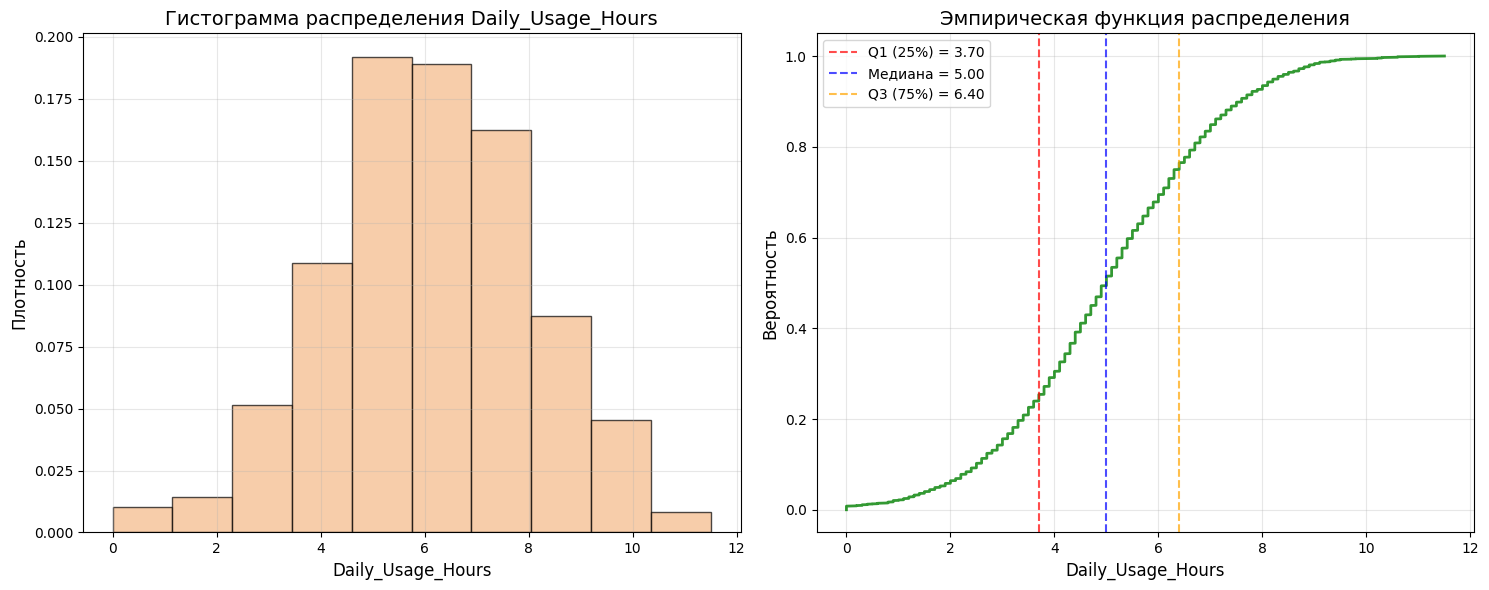


Дополнительная информация:
Минимальное значение: 0.00, максимальное значение: 11.50, размах: 11.50


In [26]:
def histogram(data, bins=10):
    minValue = min(data)
    maxValue = max(data)
    width = (maxValue - minValue) / bins
    
    # Создаем bins
    histogram = [0] * bins
    edges = [minValue + i * width for i in range(bins + 1)]
    
    # Заполняем гистограмму
    for x in data:
        if x == max:  # Особый случай для максимального значения
            index = bins - 1
        else:
            index = int((x - maxValue) / width)
        histogram[index] += 1
    
    # Нормализуем для плотности
    total = sum(histogram)
    density = [count / (total * width) for count in histogram]
    
    return edges, density, histogram

# Эмпирическая функция распределения
def ecdf(data):
    sortedData = sorted(data)
    n = len(sortedData)
    y = [i / n for i in range(1, n + 1)]
    return sortedData, y

# Построение графиков
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Гистограмма
binEdges, density, counts = histogram(data, bins=10)
binCenters = [(binEdges[i] + binEdges[i + 1]) / 2 for i in range(len(binEdges)-1)]

ax1.bar(binCenters, density, width = binEdges[1] - binEdges[0], 
        alpha = 0.7, color='#F5B987', edgecolor ='black')
ax1.set_title('Гистограмма распределения Daily_Usage_Hours', fontsize = 14)
ax1.set_xlabel('Daily_Usage_Hours', fontsize = 12)
ax1.set_ylabel('Плотность', fontsize = 12)
ax1.grid(True, alpha = 0.3)

# Эмпирическая функция распределения
ecdf_x, ecdf_y = ecdf(data)
ax2.plot(ecdf_x, ecdf_y, 'g-', alpha = 0.8, linewidth = 2)
ax2.set_title('Эмпирическая функция распределения', fontsize=14)
ax2.set_xlabel('Daily_Usage_Hours', fontsize = 12)
ax2.set_ylabel('Вероятность', fontsize = 12)
ax2.grid(True, alpha = 0.3)

# Добавляем квантили на ECDF
ax2.axvline(x=q25, color='red', linestyle='--', alpha=0.7, label=f'Q1 (25%) = {q25:.2f}')
ax2.axvline(x=median, color='blue', linestyle='--', alpha=0.7, label=f'Медиана = {median:.2f}')
ax2.axvline(x=q75, color='orange', linestyle='--', alpha=0.7, label=f'Q3 (75%) = {q75:.2f}')
ax2.legend()

plt.tight_layout()
plt.show()

# Дополнительная информация
print(f"\nДополнительная информация:")
print(f"Минимальное значение: {min(data):.2f}, максимальное значение: {max(data):.2f}, размах: {max(data) - min(data):.2f}")

Выводы:

Гистограмма демонстрирует симметричное унимодальное распределение, центр которого находится в районе 5 часов. Это визуально подтверждает близкие значения среднего, медианы и моды.

Распределение имеет умеренный разброс данных. Большинство данных сосредоточено в интервале приблизительно от 3 до 7 часов, что согласуется с интерквартильным размахом (2.70). "Хвосты" распределения (значения меньше 2.5 и больше 8 часов) показывают низкую частоту, что указывает на отсутствие массовых выбросов.

Эксцесс: форма гистограммы не является остроугольной, скорее напоминает пологий купол. Это визуальное свидетельство отрицательного эксцесса (значение -0.1226), который показывает, что распределение более плоское по сравнению с нормальным.

На графике ECDF видны ключевые точки: Q1 (25%) = 3.70, медиана (50%) = 5.00, Q3 (75%) = 6.40.

S-образная кривая ECDF является симметричной относительно точки (5.00, 0.5). Это означает, что рост функции до медианы и после неё происходит с одинаковой скоростью, что является еще одним подтверждением симметрии распределения.

II.
Проверить данные на нормальность, используя критерии:
1) Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2) Ассиметрии и эксцесса
Построить Q-Q plot

Параметры нормального распределения:
Среднее: 5.0207
Стандартное отклонение: 1.9562

КРИТЕРИЙ ХИ-КВАДРАТ:
χ² = 28.9533, df = 7, критич. значение = 14.0671
p-value = 0.0001
Вывод: Гипотеза о нормальности отвергается

КРИТЕРИЙ АСИММЕТРИИ И ЭКСЦЕССА:
Асимметрия = 0.0162, Z = 0.3624
Эксцесс = -0.1226, Z = -1.3720
Критич. значение Z (α=0.05): ±1.9600
Вывод: Нормальность



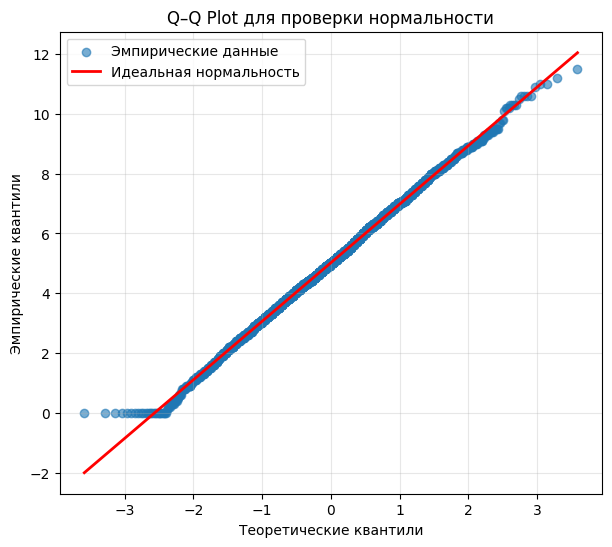

In [18]:
# Данные
data = dataDU.dropna().values
n = len(data)
mean = np.mean(data)
std_dev = np.std(data, ddof = 0)  # генеральная дисперсия

print("Параметры нормального распределения:")
print(f"Среднее: {mean:.4f}")
print(f"Стандартное отклонение: {std_dev:.4f}")
print()

# === 1. КРИТЕРИЙ ХИ-КВАДРАТ ===
def normalCDF(x, mu, sigma):
    """Функция распределения нормального закона"""
    z = (x - mu) / sigma
    return 0.5 * (1 + erf(z / sqrt(2)))

def chi2NormalityCriterion(data, mu, sigma, bins=10):
    """Критерий χ² для проверки нормальности"""
    # равновероятные интервалы
    probabilities = np.linspace(0, 1, bins + 1)
    boundaries = [stats.norm.ppf(p, loc=mu, scale=sigma) for p in probabilities]

    # наблюдаемые частоты
    observed, _ = np.histogram(data, bins=boundaries)

    # ожидаемые частоты
    expected = []
    for i in range(len(boundaries) - 1):
        p_lower = normalCDF(boundaries[i], mu, sigma)
        p_upper = normalCDF(boundaries[i+1], mu, sigma)
        expected.append(n * (p_upper - p_lower))

    # статистика χ²
    chi2Stat = sum((obs - exp_val)**2 / exp_val
                    for obs, exp_val in zip(observed, expected) if exp_val > 0)

    # степени свободы: bins - 1 - 2 параметра
    df = bins - 3
    criticalValue = stats.chi2.ppf(0.95, df)
    pValue = 1 - stats.chi2.cdf(chi2Stat, df)

    return chi2Stat, df, criticalValue, pValue

chi2Stat, df, criticalValue, pValue = chi2NormalityCriterion(data, mean, std_dev)

print("КРИТЕРИЙ ХИ-КВАДРАТ:")
print("=" * 40)
print(f"χ² = {chi2Stat:.4f}, df = {df}, критич. значение = {criticalValue:.4f}")
print(f"p-value = {pValue:.4f}")
print("Вывод:", "Нет оснований отвергнуть нормальность" if chi2Stat < criticalValue else "Гипотеза о нормальности отвергается")
print()

# === 2. КРИТЕРИЙ АСИММЕТРИИ И ЭКСЦЕССА ===
def skewnessKurtosisTest(data, alpha=0.05):
    n = len(data)
    mu = np.mean(data)
    sigma = np.std(data, ddof=0)

    # асимметрия и эксцесс
    skewness = np.mean((data - mu)**3) / sigma**3
    kurtosis = np.mean((data - mu)**4) / sigma**4 - 3

    # стандартные ошибки
    seSkew = sqrt(6 * n * (n - 1) / ((n - 2) * (n + 1) * (n + 3)))
    seKurt = sqrt(24 * n * (n - 1)**2 / ((n - 3) * (n - 2) * (n + 3) * (n + 5)))

    # z-статистики
    zSkew = skewness / seSkew
    zKurt = kurtosis / seKurt

    zCritical = stats.norm.ppf(1 - alpha/2)

    return skewness, kurtosis, zSkew, zKurt, zCritical

skewness, kurtosis, zSkew, zKurt, zCritical = skewnessKurtosisTest(data)

print("КРИТЕРИЙ АСИММЕТРИИ И ЭКСЦЕССА:")
print("=" * 40)
print(f"Асимметрия = {skewness:.4f}, Z = {zSkew:.4f}")
print(f"Эксцесс = {kurtosis:.4f}, Z = {zKurt:.4f}")
print(f"Критич. значение Z (α=0.05): ±{zCritical:.4f}")
print("Вывод:",
      "Нормальность" if abs(zSkew) < zCritical and abs(zKurt) < zCritical
      else "Отклонение от нормальности")
print()

# === 3. Q–Q PLOT ===
def manual_qq_plot(data):
    n = len(data)
    sorted_data = np.sort(data)
    theoretical_q = [stats.norm.ppf((i - 0.5) / n) for i in range(1, n + 1)]

    x_line = np.linspace(min(theoretical_q), max(theoretical_q), 100)
    y_line = mean + std_dev * x_line

    return theoretical_q, sorted_data, x_line, y_line

theoretical_q, empirical_q, x_line, y_line = manual_qq_plot(data)

plt.figure(figsize=(7, 6))
plt.scatter(theoretical_q, empirical_q, alpha=0.6, label="Эмпирические данные")
plt.plot(x_line, y_line, 'r-', linewidth=2, label="Идеальная нормальность")
plt.xlabel("Теоретические квантили")
plt.ylabel("Эмпирические квантили")
plt.title("Q–Q Plot для проверки нормальности")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

III.
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению. Например, с помощью:

1) Удаление, усечение выбросов
2) Стандартизация, нормировка
3) Логарифмирование и т.п.

Выполните пункты I и II для обработанных данных

Исходные данные: 3000 наблюдений

Оценка эффективности:

Без выбросов (IQR):
  Асимметрия: -0.046, Эксцесс: -0.239
  Shapiro-Wilk p-value: 0.000048
  Хи-квадрат p-value: 0.000561
  Наблюдений: 2990

Логарифмирование log(x+1):
  Асимметрия: -1.385, Эксцесс: 3.314
  Shapiro-Wilk p-value: 0.000000
  Хи-квадрат p-value: 0.000000
  Наблюдений: 3000

Степенное (x^0.8):
  Асимметрия: -0.288, Эксцесс: 0.196
  Shapiro-Wilk p-value: 0.000000
  Хи-квадрат p-value: 0.169764
  Наблюдений: 3000

Стандартизация (Z-score):
  Асимметрия: 0.016, Эксцесс: -0.123
  Shapiro-Wilk p-value: 0.002469
  Хи-квадрат p-value: 0.000148
  Наблюдений: 3000

Нормировка (Min-Max):
  Асимметрия: 0.016, Эксцесс: -0.123
  Shapiro-Wilk p-value: 0.002469
  Хи-квадрат p-value: 0.000148
  Наблюдений: 3000


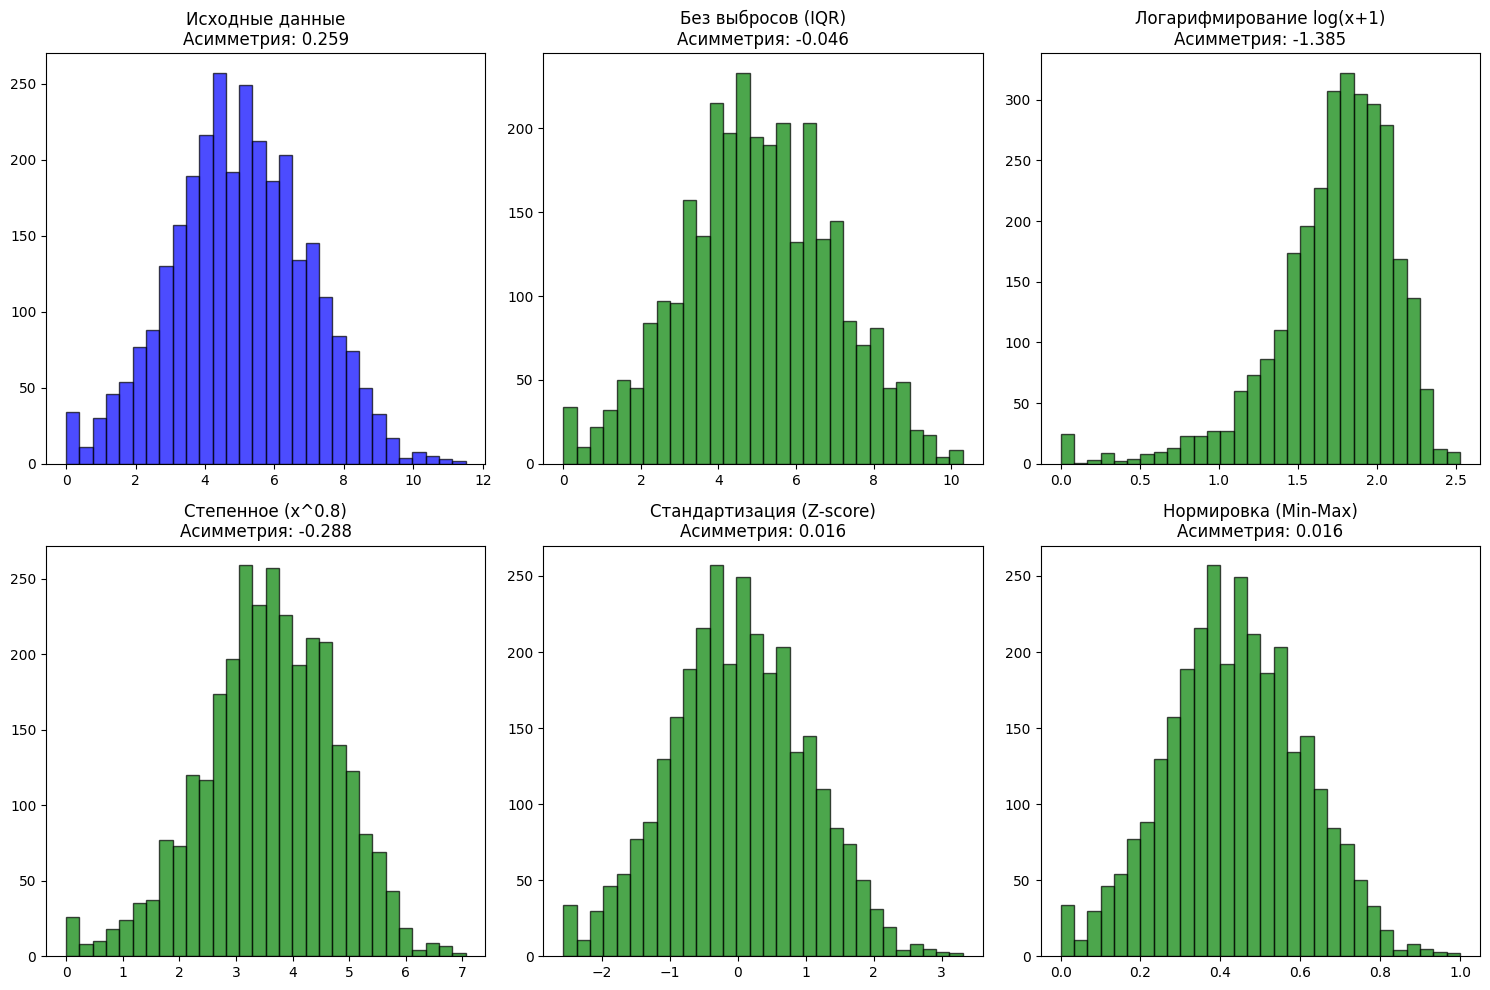


Наилучшее преобразование: Стандартизация (Z-score)
• Асимметрия: 0.016
• Эксцесс: -0.123
• Shapiro-Wilk p-value: 0.002469
• Хи-квадрат p-value: 0.000148
Вывод: Существенное отклонение от нормальности


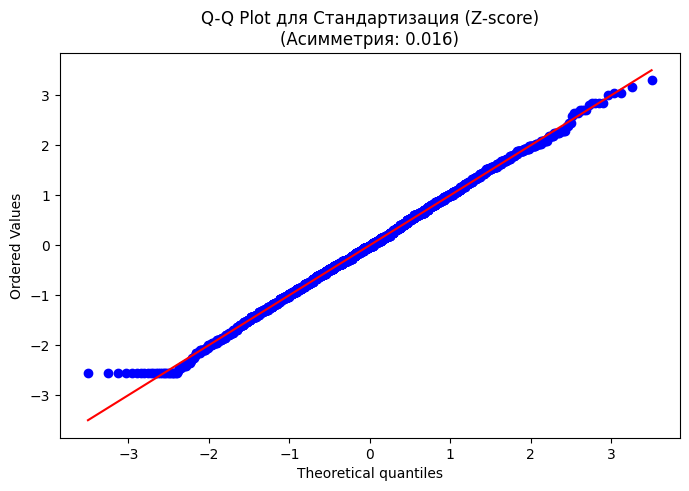

In [25]:
# Функция распределения нормального закона (для χ²)
def normalCDF(x, mu, sigma):
    z = (x - mu) / sigma
    return 0.5 * (1 + erf(z / sqrt(2)))

# χ²-тест для проверки нормальности
def chi2NormalityCriterion(data, bins=10):
    n = len(data)
    mu, sigma = np.mean(data), np.std(data, ddof=0)

    # равновероятные интервалы
    probabilities = np.linspace(0, 1, bins + 1)
    boundaries = [stats.norm.ppf(p, loc=mu, scale=sigma) for p in probabilities]

    # наблюдаемые частоты
    observed, _ = np.histogram(data, bins=boundaries)

    # ожидаемые частоты
    expected = []
    for i in range(len(boundaries) - 1):
        pLower = normalCDF(boundaries[i], mu, sigma)
        pUpper = normalCDF(boundaries[i+1], mu, sigma)
        expected.append(n * (pUpper - pLower))

    # χ²-статистика
    chi2_stat = sum((obs - expVal) ** 2 / expVal
                    for obs, expVal in zip(observed, expected) if expVal > 0)

    df = bins - 3  # bins - 1 - 2 параметра
    p_value = 1 - stats.chi2.cdf(chi2_stat, df)

    return chi2_stat, df, p_value

data = dataDU.dropna().values
print(f"Исходные данные: {len(data)} наблюдений")
transformations = {}

# a) Удаление выбросов (IQR метод)
q1, q3 = np.quantile(data, 0.25), np.quantile(data, 0.75)
iqr = q3 - q1
lower_bound, upper_bound = q1 - 1.5*iqr, q3 + 1.5*iqr
data_no_outliers = data[(data >= lower_bound) & (data <= upper_bound)]
transformations['Без выбросов (IQR)'] = data_no_outliers

# b) Логарифмирование
transformations['Логарифмирование log(x+1)'] = np.log1p(data)

# c) Степенное преобразование
transformations['Степенное (x^0.8)'] = data ** 0.8

# d) Стандартизация (Z-score)
transformations['Стандартизация (Z-score)'] = (data - np.mean(data)) / np.std(data)

# e) Нормировка (Min-Max)
transformations['Нормировка (Min-Max)'] = (data - np.min(data)) / (np.max(data) - np.min(data))

results = []
print("\nОценка эффективности:")
print("=" * 60)

for name, transformedData in transformations.items():
    skewness = stats.skew(transformedData)
    kurtosis = stats.kurtosis(transformedData)
    shapiroStat, shapiroP = stats.shapiro(transformedData)
    chi2Stat, df, chi2P = chi2NormalityCriterion(transformedData)

    results.append({
        'name': name,
        'skewness': skewness,
        'kurtosis': kurtosis,
        'shapiro_p': shapiroP,
        'chi2_p': chi2P,
        'n': len(transformedData)
    })

    print(f"\n{name}:")
    print(f"  Асимметрия: {skewness:.3f}, Эксцесс: {kurtosis:.3f}")
    print(f"  Shapiro-Wilk p-value: {shapiroP:.6f}")
    print(f"  Хи-квадрат p-value: {chi2P:.6f}")
    print(f"  Наблюдений: {len(transformedData)}")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

axes[0].hist(data, bins=30, alpha=0.7, color='blue', edgecolor='black')
axes[0].set_title('Исходные данные\nАсимметрия: 0.259')

for i, (name, transformed_data) in enumerate(transformations.items(), 1):
    if i >= len(axes):
        break
    result = next(r for r in results if r['name'] == name)
    axes[i].hist(transformed_data, bins=30, alpha=0.7, color='green', edgecolor='black')
    axes[i].set_title(f'{name}\nАсимметрия: {result["skewness"]:.3f}')

plt.tight_layout()
plt.show()

bestTransform = max(results, key=lambda x: (x['shapiro_p'], -abs(x['skewness'])))

print(f"\n{'='*60}")
print(f"Наилучшее преобразование: {bestTransform['name']}")
print(f"{'='*60}")
print(f"• Асимметрия: {bestTransform['skewness']:.3f}")
print(f"• Эксцесс: {bestTransform['kurtosis']:.3f}")
print(f"• Shapiro-Wilk p-value: {bestTransform['shapiro_p']:.6f}")
print(f"• Хи-квадрат p-value: {bestTransform['chi2_p']:.6f}")
print("Вывод:", "Распределение близко к нормальному"
      if bestTransform['shapiro_p'] > 0.05 and bestTransform['chi2_p'] > 0.05
      else "Существенное отклонение от нормальности")

best_data = transformations[bestTransform['name']]
plt.figure(figsize=(8, 5))
stats.probplot(best_data, dist="norm", plot=plt)
plt.title(f'Q-Q Plot для {bestTransform["name"]}\n(Асимметрия: {bestTransform["skewness"]:.3f})')
plt.show()

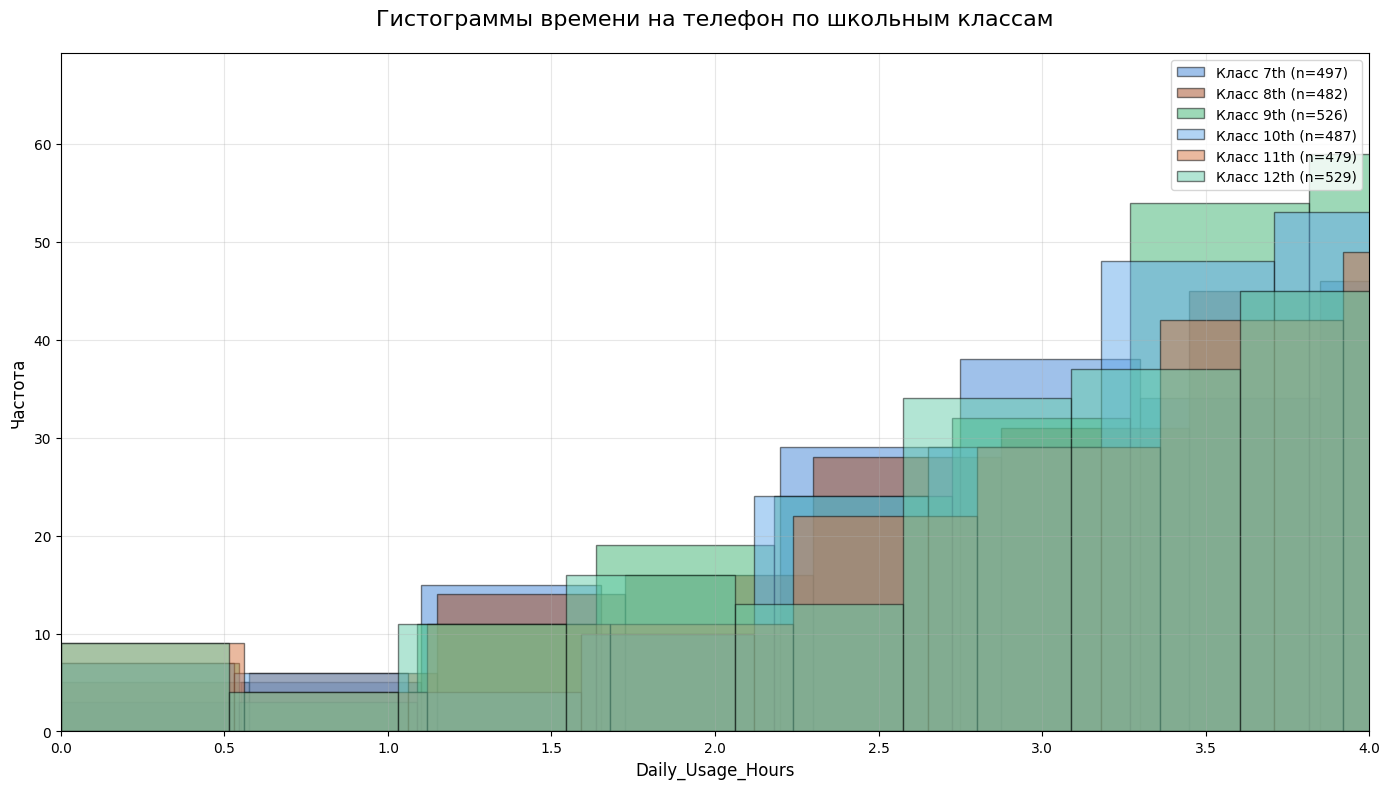

Статистика по классам:
Класс  Количество  Среднее  Дисперсия
  7th         497    5.077      3.883
  8th         482    5.066      4.010
  9th         526    5.012      3.913
 10th         487    4.978      3.813
 11th         479    5.062      3.635
 12th         529    4.937      3.736


In [23]:
correctOrder = ['7th', '8th', '9th', '10th', '11th', '12th']

# Группировка по классам
grouped = allData.groupby('School_Grade')['Daily_Usage_Hours']

# Создание графика
plt.figure(figsize=(14, 8))

# Цвета
colors = ['#4184D6', '#A44A22', '#3CB371', '#64AAEB', '#D67541', '#66CDAA']

# Таблица статистик
statsData = []

for i, grade in enumerate(correctOrder):
    gradeData = grouped.get_group(grade)

    # Гистограмма
    plt.hist(
        gradeData,
        bins=20,
        alpha=0.5,
        color=colors[i],
        edgecolor='black',
        label=f'Класс {grade} (n={len(gradeData)})'
    )

    # Среднее и дисперсия
    meanVal = gradeData.mean()
    varianceVal = gradeData.var()

    statsData.append({
        'Класс': grade,
        'Количество': len(gradeData),
        'Среднее': round(meanVal, 3),
        'Дисперсия': round(varianceVal, 3)
    })

# Настройки графика
plt.title('Гистограммы времени на телефон по школьным классам', fontsize=16, pad=20)
plt.xlabel('Daily_Usage_Hours', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.legend(fontsize=10, loc='upper right')
plt.xlim(0, 4)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Вывод статистики
stats_df = pd.DataFrame(statsData)
print("=" * 80)
print("Статистика по классам:")
print("=" * 80)
print(stats_df.to_string(index=False))

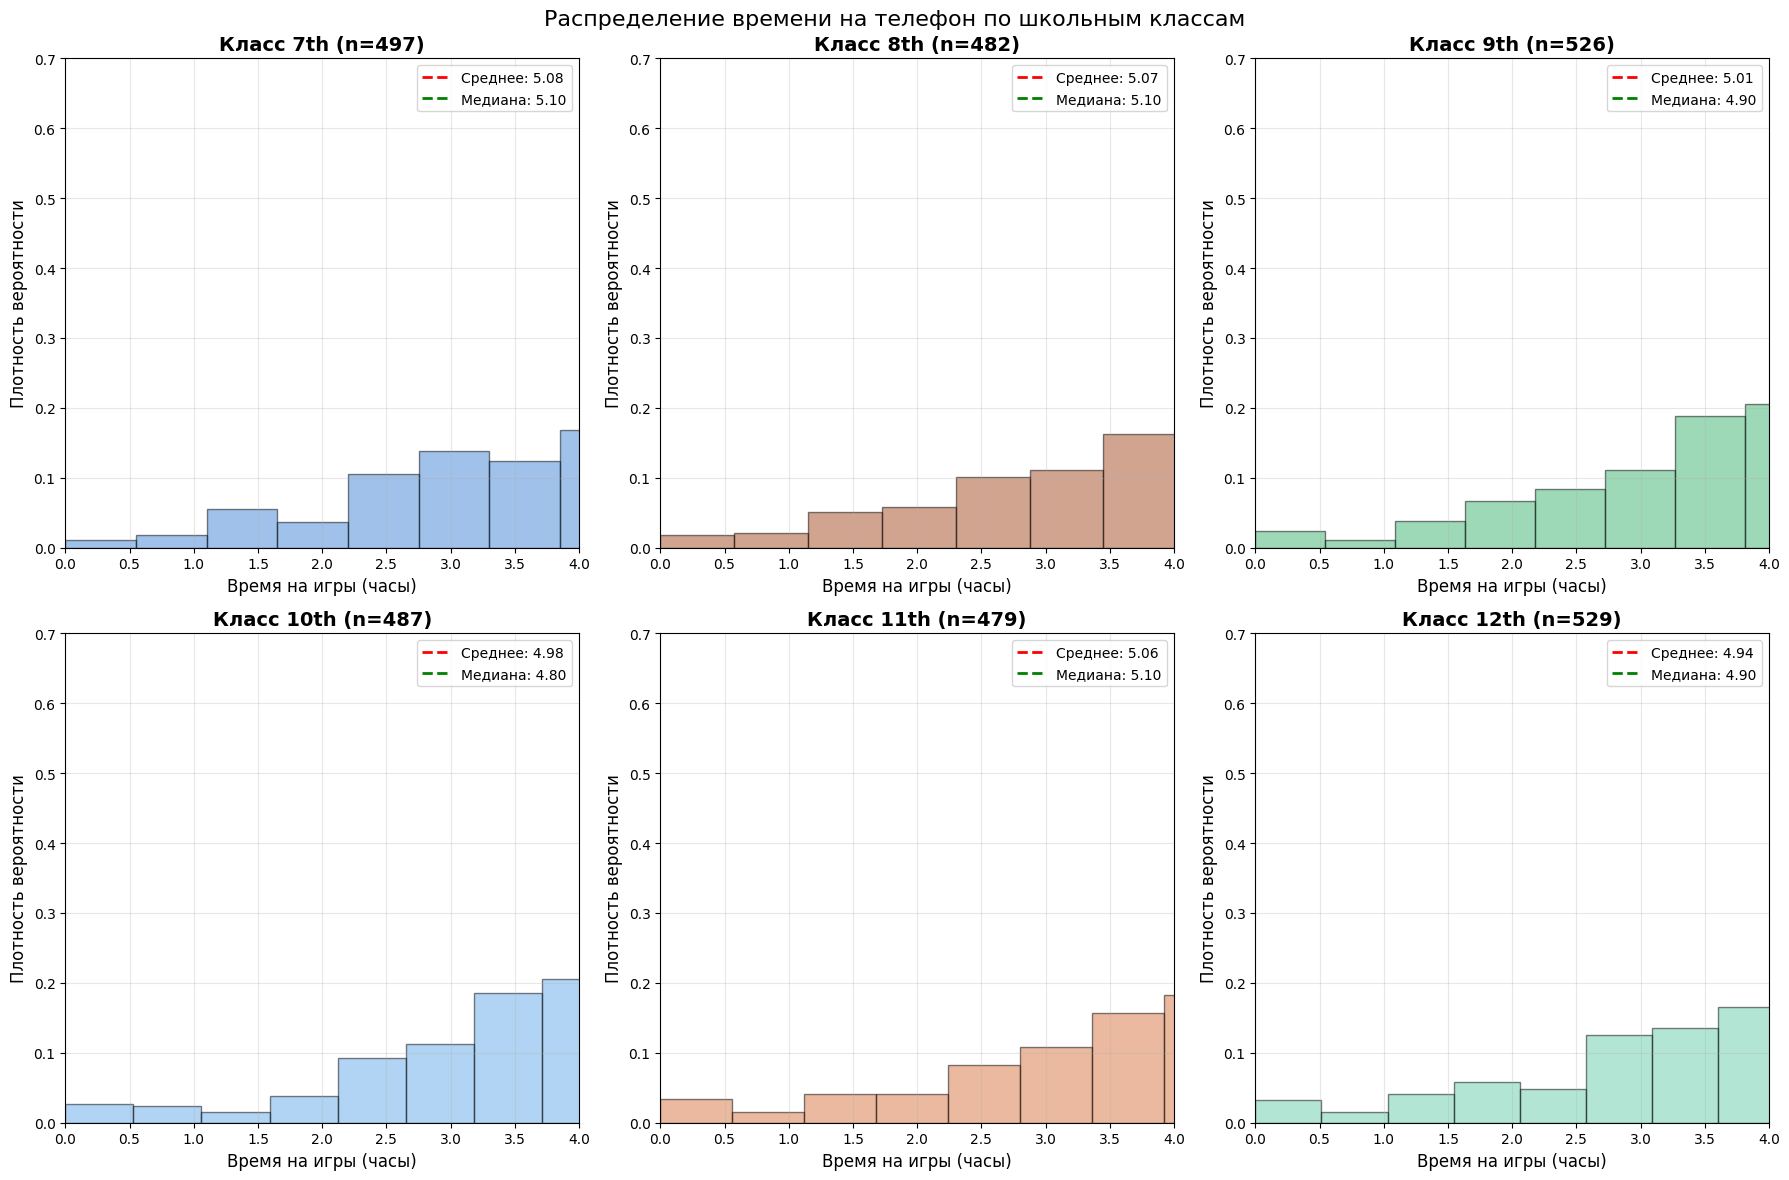

In [24]:

grades = correctOrder

# Цвета для каждого класса
colors = ['#4184D6', '#A44A22', '#3CB371', '#64AAEB', '#D67541', '#66CDAA']

# Создание subplot с сеткой 2x3
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Построение отдельных гистограмм для каждого класса
for i, grade in enumerate(grades):
    gradeData = grouped.get_group(grade)
    
    # Построение гистограммы
    axes[i].hist(gradeData, bins=20, alpha=0.5, color=colors[i], 
                edgecolor='black', density=True)
    
    # Расчет статистик
    meanVal = gradeData.mean()
    medianVal = gradeData.median()
    
    # Добавление линий среднего и медианы
    axes[i].axvline(meanVal, color='red', linestyle='--', linewidth=2, 
                   label=f'Среднее: {meanVal:.2f}')
    axes[i].axvline(medianVal, color='green', linestyle='--', linewidth=2,
                   label=f'Медиана: {medianVal:.2f}')
    
    # Настройка subplot
    axes[i].set_title(f'Класс {grade} (n={len(gradeData)})', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Время на игры (часы)', fontsize=12)
    axes[i].set_ylabel('Плотность вероятности', fontsize=12)
    axes[i].grid(True, alpha=0.3)
    axes[i].set_xlim(0, 4)
    axes[i].set_ylim(0, 0.7)
    axes[i].legend(fontsize=10)

# Удаляем пустые subplots, если классов меньше 6
for i in range(len(grades), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle('Распределение времени на телефон по школьным классам', 
             fontsize=16, y=0.98)
plt.tight_layout()
plt.show()